# Implementando a Transformada de Hilbert nas fotos 2D
Como temos fotos 1D, convencionalmente não podemos usar arquiteturas de redes neurais convolucionais que fazem uso da convolução 2D, e embora as plataformas de aprendizado de maquina (keras+tensorflow, pytorch) implementem convoluções 1D, decidimos fazer nossas imagens 1D ocuparem um espaço 2D usando a [Curva de Hilbert](https://en.wikipedia.org/wiki/Hilbert_curve), para podermos aplicar os metodos e algoritmos comumente usados em imagens.

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Hilbert-curve_rounded-gradient-animated.gif/330px-Hilbert-curve_rounded-gradient-animated.gif" alt="Curva de Hilbert."/>
<figure-caption>Curva de Hilbert</figure-caption>
</figure>

A curva de Hilbert tem uma propiedade interessante de preservar seções continuas de valores junto, sem quebras por uma nova linha, diferente de simplesmente inserir os valores de pixel em blocos de 32 a cada nova linha.

## Bibiliotecas e imports usados
Enfoque na bibilioteca [numpy-hilbert-curve](https://pypi.org/project/numpy-hilbert-curve/) que implementa a curva de Hilbert para arrays de numpy
e pode ser importada com
```
!pip install numpy-hilbert-curve 
```

In [10]:
import cv2
import numpy as np
import os
import natsort
import pandas as pd
import time
from pathlib import Path
import matplotlib.pyplot as plt
from hilbert import decode, encode
plt.rcParams['figure.figsize'] = [16, 9]

## Funções e definições

In [27]:

#locs é uma array que mapeia a posição de cada valor de uma serie de 1024 valores em uma curva de hilbert
locs = decode(np.array(range(1024)), 2, 5)

def photo1d2hilbert(locs,pict):
    ch=[]
    for channel in range(pict.shape[2]):

        layer=pict[0,:,channel]
        canvas=np.zeros((32,32),dtype='uint16')
        for index, x in enumerate(locs):
            canvas[x[0],x[1]]=layer[index]
        ch.append(canvas)

    ccanvas=cv2.merge([ch[0], ch[1], ch[2], ch[3]])
    return ccanvas

#untransform desfaz a foto 1d para a melhor imagem 2d possivel da caixa

def untransform(result):
    canvas=np.ones((result.shape[1],result.shape[1],3), np.uint8)
    canvas=canvas*255
    for index, x in enumerate(result[0]):
        canvas[0:x[3],index,:]=[x[0],x[1],x[2]]
    	
    canvas = cv2.flip(canvas, 0)
    return canvas
    


## Demonstração

qtd=05


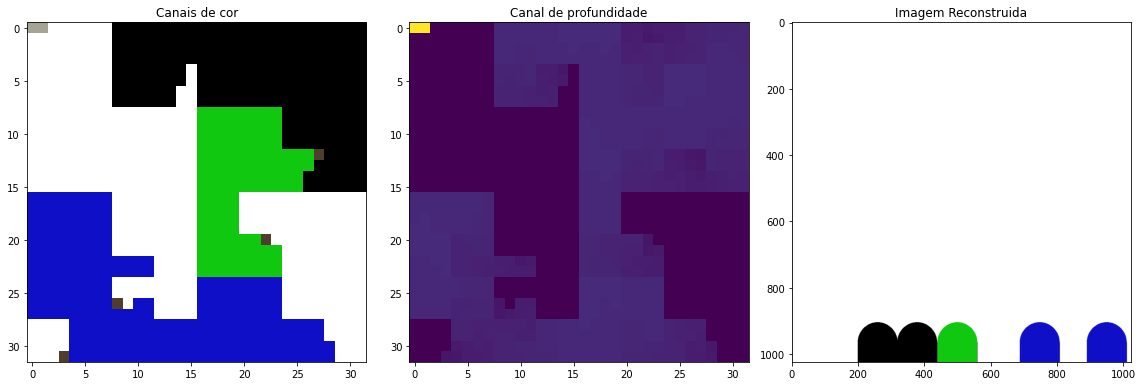

qtd=25


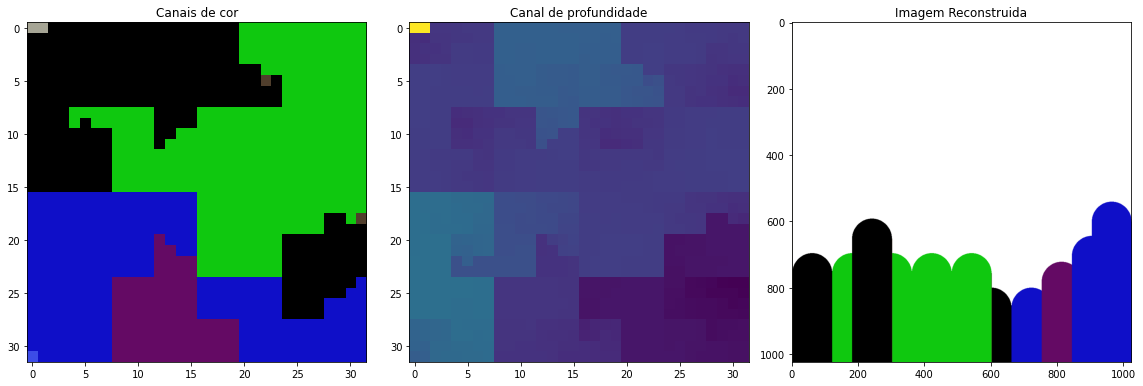

qtd=50


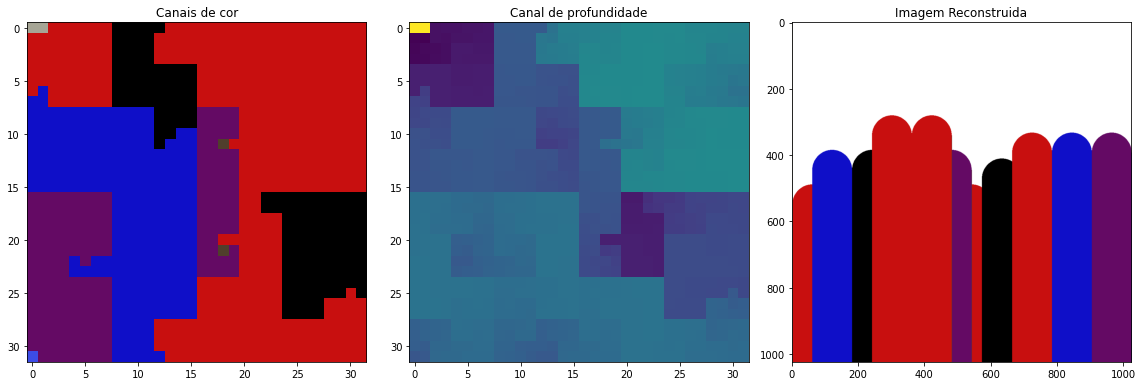

In [42]:
#importa foto 1d salva
pict=np.load('circle/05/caixa000_qtd05.npy')

#a foto 2d tem shape (32, 32, 4)
npict=photo1d2hilbert(locs,pict)

#os primeiros 3 canais são os canais de cor
img_scaled1 = cv2.resize(npict[:,:,:-1].astype('uint8'), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

#o ultimo canal é a altura do pixel
img_scaled = cv2.resize(npict[:,:,3], None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

npict2=cv2.resize(untransform(pict), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

print('qtd=05')

plt.figure()
# using subplot function and creating plot one
plt.subplot(1, 3, 1)  # row 1, column 2, count 1
plt.imshow(img_scaled1)
plt.title('Canais de cor')

plt.subplot(1, 3, 2)
plt.imshow(img_scaled)
plt.title('Canal de profundidade')

plt.subplot(1, 3, 3)
plt.imshow(npict2)
plt.title('Imagem Reconstruida')

# space between the plots
plt.tight_layout()


plt.show()

#importa foto 1d salva
pict=np.load('circle/25/caixa000_qtd25.npy')

#a foto 2d tem shape (32, 32, 4)
npict=photo1d2hilbert(locs,pict)

#os primeiros 3 canais são os canais de cor
img_scaled1 = cv2.resize(npict[:,:,:-1].astype('uint8'), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

#o ultimo canal é a altura do pixel
img_scaled = cv2.resize(npict[:,:,3], None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

npict2=cv2.resize(untransform(pict), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

print('qtd=25')

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(img_scaled1)
plt.title('Canais de cor')

plt.subplot(1, 3, 2)
plt.imshow(img_scaled)
plt.title('Canal de profundidade')

plt.subplot(1, 3, 3)
plt.imshow(npict2)
plt.title('Imagem Reconstruida')

# space between the plots
plt.tight_layout()

plt.show()

#importa foto 1d salva
pict=np.load('circle/50/caixa000_qtd50.npy')

#a foto 2d tem shape (32, 32, 4)
npict=photo1d2hilbert(locs,pict)

#os primeiros 3 canais são os canais de cor
img_scaled1 = cv2.resize(npict[:,:,:-1].astype('uint8'), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

#o ultimo canal é a altura do pixel
img_scaled = cv2.resize(npict[:,:,3], None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

npict2=cv2.resize(untransform(pict), None, fx=1, fy=1, interpolation = cv2.INTER_NEAREST)

print('qtd=50')

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(img_scaled1)
plt.title('Canais de cor')

plt.subplot(1, 3, 2)
plt.imshow(img_scaled)
plt.title('Canal de profundidade')

plt.subplot(1, 3, 3)
plt.imshow(npict2)
plt.title('Imagem Reconstruida')

# space between the plots
plt.tight_layout()

plt.show()


## Aplicação em Batelada

In [48]:
datasets=['circle/circle.json']

for dataset in datasets:
    thingname=dataset.split("/")
    thingname=thingname[0]
    df = pd.read_json(dataset)
    for index, row in df.iterrows():
        pathname=os.path.split(row['file'])
        path=pathname[0]
        path=path.replace(thingname,thingname+'_hilbert')
        Path(path).mkdir(parents=True, exist_ok=True)
        
    referencelist=[]
    for index, row in df.iterrows():
        references={}
        pict=np.load(row['file'])
        npict=photo1d2hilbert(locs,pict)
        savename=row['file']
        savename=savename.replace(thingname,thingname+'_hilbert')
        references['file']=savename
        references['Y']=row['Y']
        referencelist.append(references)
        np.save(savename, npict)
    
    df2 = pd.DataFrame.from_dict(referencelist)

    df2.to_json(os.path.join(thingname+'_hilbert',thingname+'_hilbert'+'.json'))
    
        
        
        

## Bastidores e testes

In [15]:

cv2.imshow('Scaling', img_scaled)
cv2.imshow('Scaling1', img_scaled1)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
df = pd.read_json('circle/circle.json')

In [45]:
for index, row in df.iterrows():
    pict=np.load(row['file'])
    npict=photo1d2hilbert(locs,pict)
    nnpict=cv2.resize(npict[:,:,:-1].astype('uint8'), None, fx=16, fy=16, interpolation = cv2.INTER_NEAREST)
    nnpict3=cv2.resize((npict[:,:,3]/4).astype('uint8'), None, fx=16, fy=16, interpolation = cv2.INTER_NEAREST)
    nnpict3=cv2.merge([nnpict3, nnpict3, nnpict3])
    npict2=cv2.resize(untransform(pict), None, fx=0.5, fy=0.5, interpolation = cv2.INTER_NEAREST)
    final=np.concatenate((npict2, nnpict,nnpict3), axis=1)
    savename=row['file']
    savename=savename[-9:]
    savename=savename.replace("npy", "png")
    savename='display/'+savename
    cv2.imwrite(savename, final)
    print(row['file'])
    print(os.path.split(row['file']))
    print(savename)
    

circle/00/caixa000_qtd00.npy
('circle/00', 'caixa000_qtd00.npy')
display/qtd00.png
circle/01/caixa000_qtd01.npy
('circle/01', 'caixa000_qtd01.npy')
display/qtd01.png
circle/02/caixa000_qtd02.npy
('circle/02', 'caixa000_qtd02.npy')
display/qtd02.png
circle/03/caixa000_qtd03.npy
('circle/03', 'caixa000_qtd03.npy')
display/qtd03.png
circle/04/caixa000_qtd04.npy
('circle/04', 'caixa000_qtd04.npy')
display/qtd04.png
circle/05/caixa000_qtd05.npy
('circle/05', 'caixa000_qtd05.npy')
display/qtd05.png
circle/06/caixa000_qtd06.npy
('circle/06', 'caixa000_qtd06.npy')
display/qtd06.png
circle/07/caixa000_qtd07.npy
('circle/07', 'caixa000_qtd07.npy')
display/qtd07.png
circle/08/caixa000_qtd08.npy
('circle/08', 'caixa000_qtd08.npy')
display/qtd08.png
circle/09/caixa000_qtd09.npy
('circle/09', 'caixa000_qtd09.npy')
display/qtd09.png
circle/10/caixa000_qtd10.npy
('circle/10', 'caixa000_qtd10.npy')
display/qtd10.png
circle/11/caixa000_qtd11.npy
('circle/11', 'caixa000_qtd11.npy')
display/qtd11.png
circ

In [17]:
a='circle/00/caixa000_qtd00.npy'
print(a[-9:])

qtd00.npy
